In [1]:
import re
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cellpose.models import CellposeModel
from cellpose import io
import cv2
from src.cellpose.evaluate import rles_to_mask

In [2]:
cellpose_model_path = Path("weights/cellpose_weights.ckpt")
test_image_paths = list(Path("data/hidden_test/images").glob("**/*"))
test_df = pd.read_csv("data/hidden_test/test.csv")

In [3]:
# here choose any image path
image_path = test_image_paths[5]
print("image_path", image_path)

flow_image = io.imread(str(image_path))

image_rgb = cv2.imread(str(image_path))
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

image_path data/hidden_test/images/4378ec854810.png


In [4]:
anno_rle = test_df[test_df.id == image_path.stem].annotation
anno_rle = rles_to_mask(anno_rle, [520, 704])
annotations = []

for ii in np.unique(anno_rle):
    if ii == 0:
        continue
    annotations.append(anno_rle == ii)

In [5]:
model = CellposeModel(
    pretrained_model=str(cellpose_model_path),
    gpu=True
)
print("Model loaded!")

preds, flows, _ = model.eval(flow_image, diameter=19, channels=[0, 0], augment=True, resample=True)

segmentation_masks = []
for i in range(1, preds.max() + 1):
    mask = preds == i
    segmentation_masks.append(mask)


segmentation_masks = np.array(segmentation_masks)
print(segmentation_masks.shape)


Model loaded!


/home/danis/anaconda3/envs/new-cell/lib/python3.9/site-packages/torch/nn/modules/module.py:1190: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return forward_call(*input, **kwargs)


(65, 520, 704)


/home/danis/Projects/Miscellaneous/PMLDL/Lab/final-project/src/cellpose/generate_images_for_report.py:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  predictions = torch.as_tensor(predictions, dtype=torch.bool)


predictions vs target masks


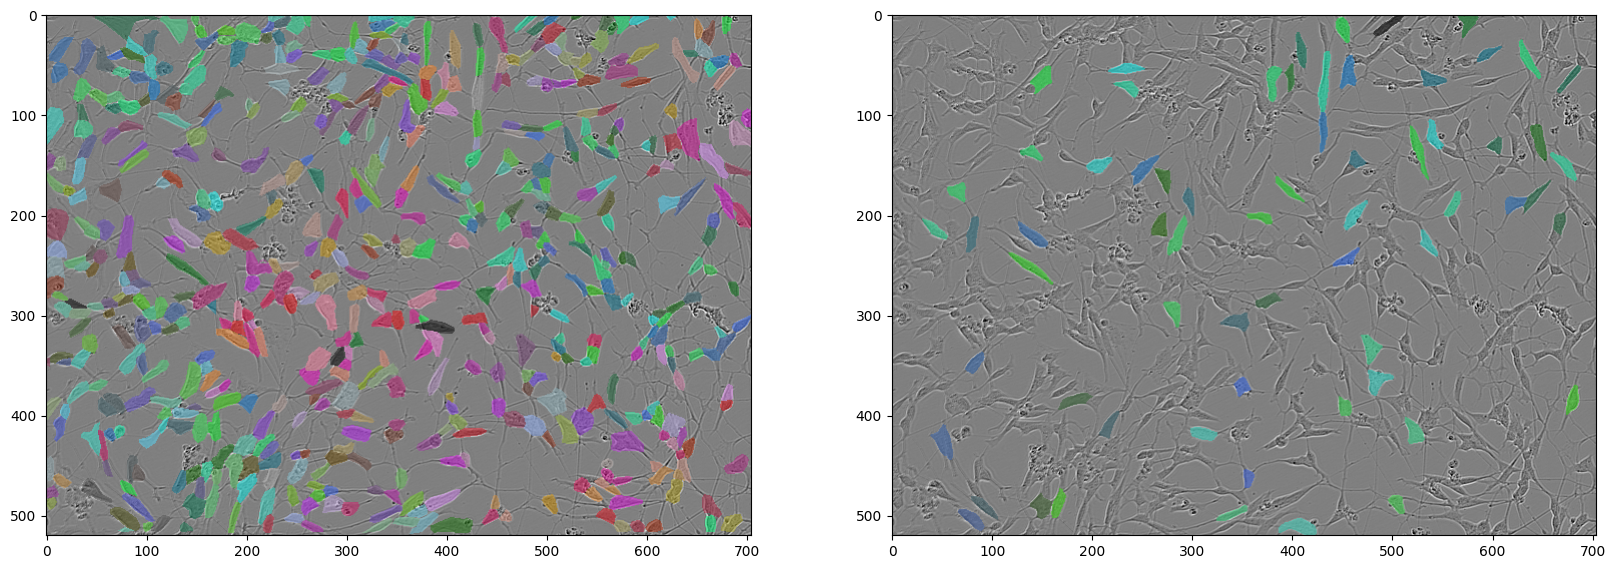

In [6]:
from src.cellpose.generate_images_for_report import draw_beautiful_image

prediction, target = draw_beautiful_image(image_rgb, segmentation_masks, annotations)

print("predictions vs target masks")
f, ax = plt.subplots(ncols=2, figsize=(20, 20))

ax[0].imshow(prediction)
ax[1].imshow(target)

plt.show()

![image](figures/img.png)
